In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_score
from teaching_tools.widgets import ClusterWidget, SCFClusterWidget
from sklearn.cluster import KMeans
import plotly.express as px
from scipy.stats.mstats import trimmed_var
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install teaching_tools

In [ ]:
df = pd.read_csv("/content/SCFP2019.csv")

In [ ]:
df.shape

(28885, 351)

In [ ]:
mask = df["TURNFEAR"]==1
df_fear = df[mask]
print("df_fear shape:", df_fear.shape)
df_fear.head()

df_fear shape: (4623, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


In [ ]:
age_groups = df_fear["AGECL"].unique()
print("Age Groups:", age_groups)

Age Groups: [3 5 1 2 4 6]


In [ ]:
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = df_fear["AGECL"].replace(agecl_dict)
age_cl.head(10)

5      45-54
6      45-54
7      45-54
8      45-54
9      45-54
110    65-74
111    65-74
112    65-74
113    65-74
114    65-74
Name: AGECL, dtype: object

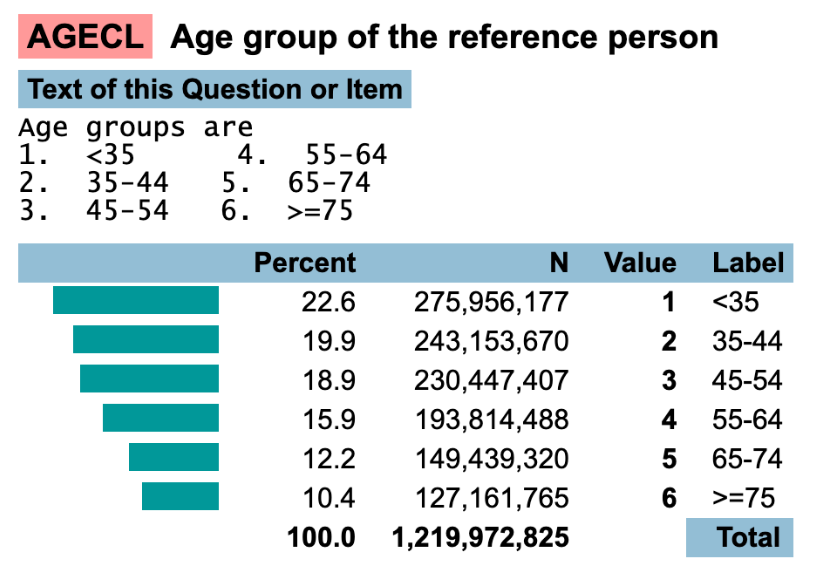

<Axes: >

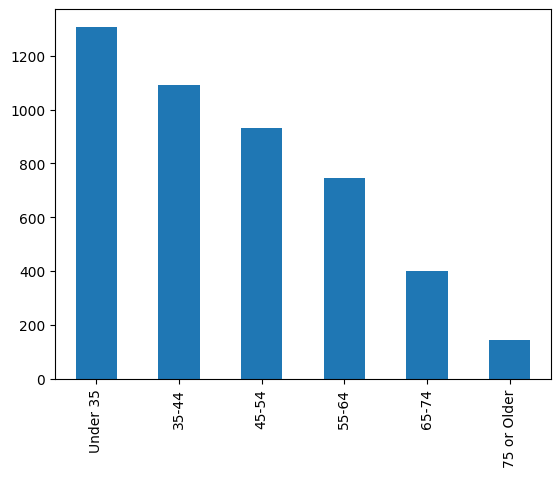

In [ ]:
age_cl_value_counts = age_cl.value_counts()
age_cl_value_counts.plot(kind="bar")
# Bar plot of `age_cl_value_counts`


<Axes: >

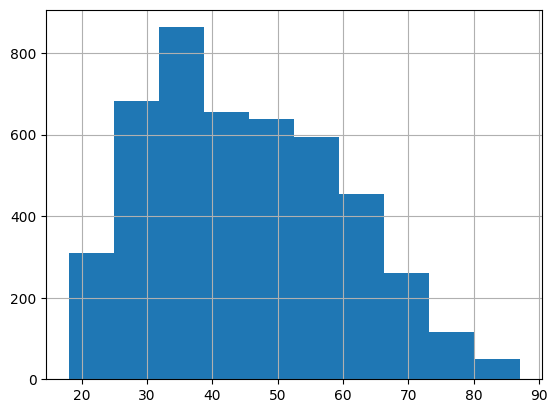

In [ ]:
df_fear["AGE"].hist(bins=10)

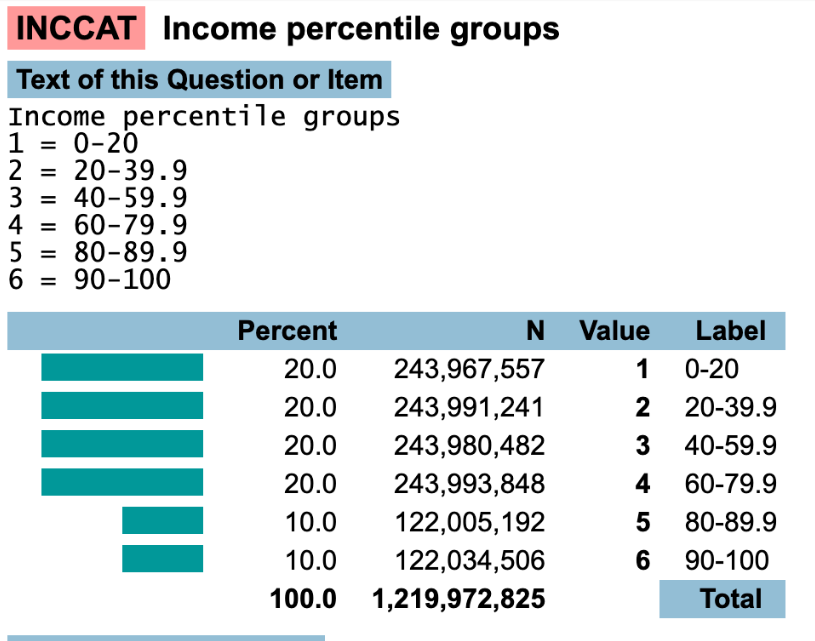

In [ ]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = (
    df["INCCAT"].replace(inccat_dict).groupby(df["TURNFEAR"]).value_counts(normalize=True)
    .rename("frequency")
    .to_frame()
    .reset_index()



)

df_inccat

,TURNFEAR,INCCAT,frequency
0,0,90-100,0.297296
1,0,60-79.9,0.174841
2,0,40-59.9,0.143146
3,0,0-20,0.140343
4,0,21-39.9,0.135933
5,0,80-89.9,0.108441
6,1,0-20,0.288125
7,1,21-39.9,0.256327
8,1,40-59.9,0.228856
9,1,60-79.9,0.132598


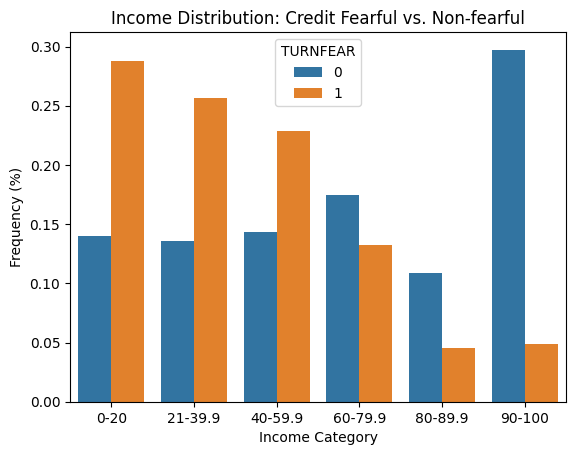

In [ ]:
# Create bar chart of `df_inccat`
sns.barplot(
    x="INCCAT",
    y = "frequency",
    hue = "TURNFEAR",
    data = df_inccat,
    order = inccat_dict.values()

)
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");

In [ ]:
asset_house_corr = df["ASSET"].corr(df["HOUSES"])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.5198273544779252


In [ ]:
asset_house_corr = df_fear["ASSET"].corr(df_fear["HOUSES"])
print("Credit Fearful: Asset Houses Correlation:", asset_house_corr)

Credit Fearful: Asset Houses Correlation: 0.583287973597916


In [ ]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.519827,0.622429,0.261250,0.116673
HOUSES,0.519827,1.000000,0.247852,0.266661,0.169300
INCOME,0.622429,0.247852,1.000000,0.114646,0.069400
DEBT,0.261250,0.266661,0.114646,1.000000,0.054179
EDUC,0.116673,0.169300,0.069400,0.054179,1.000000


In [ ]:
corr = df_fear[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.583288,0.722074,0.474658,0.113536
HOUSES,0.583288,1.000000,0.264099,0.962629,0.160348
INCOME,0.722074,0.264099,1.000000,0.172393,0.133170
DEBT,0.474658,0.962629,0.172393,1.000000,0.177386
EDUC,0.113536,0.160348,0.133170,0.177386,1.000000


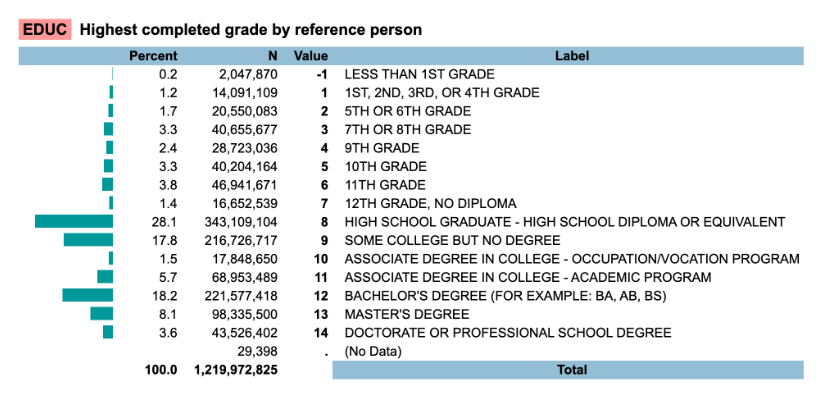

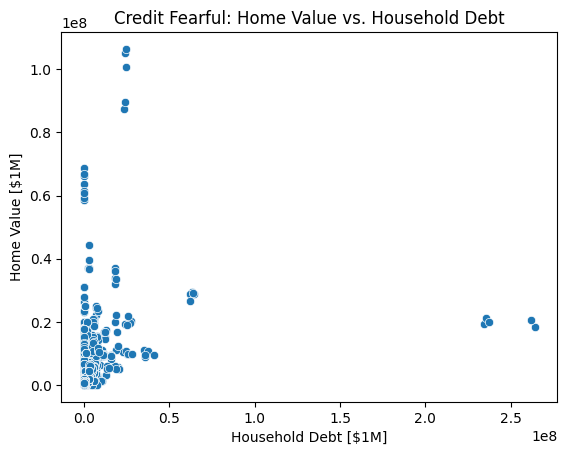

In [ ]:
# Plot "HOUSES" vs "DEBT"
sns.scatterplot(x=df["DEBT"], y =df["HOUSES"])
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

In [ ]:
df = df_fear.copy()

In [ ]:
X = df[["DEBT","HOUSES"]]
print(X.shape)
X.head()

(4623, 2)


,DEBT,HOUSES
5,12200.0,0.0
6,12600.0,0.0
7,15300.0,0.0
8,14100.0,0.0
9,15400.0,0.0


In [ ]:
cw = ClusterWidget(n_clusters=3)
cw.show()

In [ ]:
scfc = SCFClusterWidget(x=df["DEBT"], y=df["HOUSES"], n_clusters=3)
scfc.show()

In [ ]:
# Build model
model = KMeans(n_clusters=3, random_state=42)
# Fit model to data
model.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
labels = model.labels_
labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

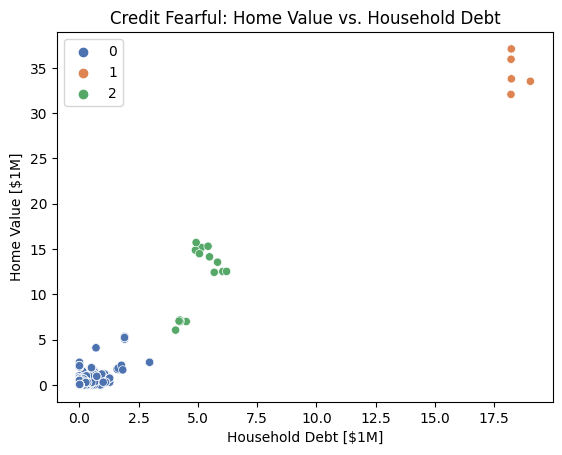

In [ ]:
# Plot "HOUSES" vs "DEBT" with hue=label
sns.scatterplot(
    x = df["DEBT"]/1e6,
    y = df["HOUSES"]/1e6,
    hue = labels,
    palette = "deep"
)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

In [ ]:
centroids = model.cluster_centers_
centroids

array([[   91017.57766674,   116150.29328698],
       [18384100.        , 34484000.        ],
       [ 5065800.        , 11666666.66666667]])

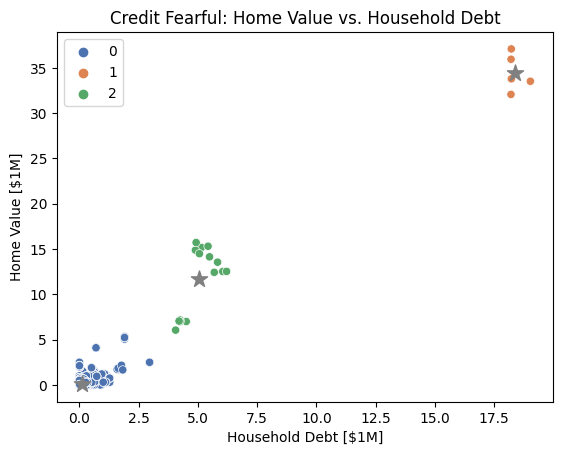

In [ ]:
# Plot "HOUSES" vs "DEBT", add centroids
sns.scatterplot(
    x = df["DEBT"]/1e6,
    y = df["HOUSES"]/1e6,

    hue = labels,
    palette = "deep"
)
plt.scatter(
    x = centroids[:,0]/1e6,
    y = centroids[:,1]/1e6,
    color = "grey",
    marker ="*",
    s=150
)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

In [ ]:
inertia = model.inertia_
print("Inertia (3 clusters):", inertia/1e12)

Inertia (3 clusters): 939.5540107970575


In [ ]:
ss = silhouette_score(X, labels)
print("Silhouette Score (3 clusters):", ss)

Silhouette Score (3 clusters): 0.9768842462944348


In [ ]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []
for n in n_clusters:

    model = KMeans(n_clusters=n, random_state=42)
    # Fit model to data
    model.fit(X)
    inertia = model.inertia_
    ss = silhouette_score(X, model.labels_)
    inertia_errors.append(inertia)
    silhouette_scores.append(ss)
    print(n)


# Add `for` loop to train model and calculate inertia, silhouette score.


print("Inertia:", inertia_errors)
print()
print("Silhouette Scores:", silhouette_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


11


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


12
Inertia: [3018038313336920.0, 939554010797057.5, 546098841715650.0, 309310386410919.8, 235243397481786.56, 182225729179700.12, 150670779013794.06, 114321995931019.72, 100340259483917.66, 86229997033602.6, 74757234072099.45]

Silhouette Scores: [0.9855099957519555, 0.9768842462944348, 0.9490311483406091, 0.839330043242819, 0.7287406719898627, 0.726989114305748, 0.7263840026889208, 0.7335125606476427, 0.692157992955073, 0.6949309528556856, 0.6951831031001252]


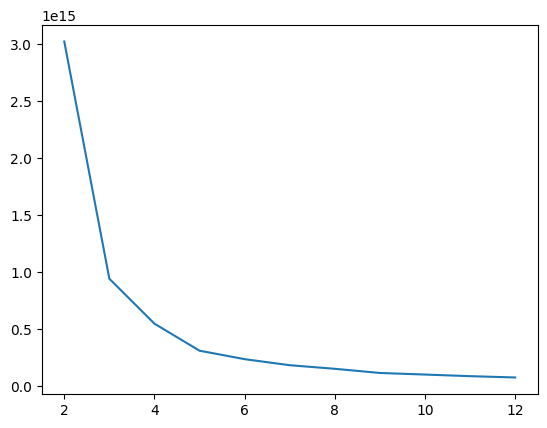

In [ ]:
# Plot `inertia_errors` by `n_clusters`

plt.plot(n_clusters, inertia_errors)

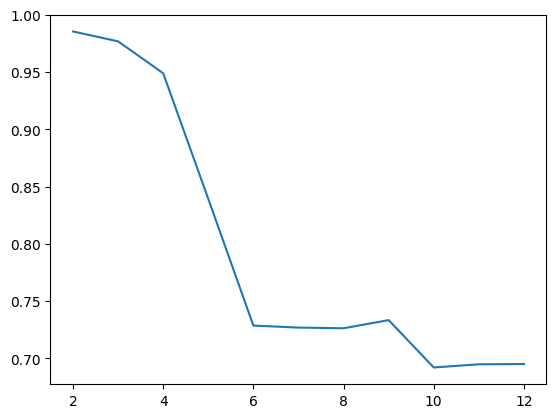

In [ ]:
# Plot `silhouette_scores` vs `n_clusters`
plt.plot(n_clusters, silhouette_scores)

In [ ]:
# Build model

final_model = KMeans(n_clusters=4, random_state=42)
final_model.fit(X)
# Fit model to data


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [ ]:
xgb = X.groupby(final_model.labels_).mean()
xgb

,DEBT,HOUSES
0,8.488629e+04,1.031872e+05
1,1.838410e+07,3.448400e+07
2,5.472800e+06,1.407400e+07
3,2.420929e+06,4.551429e+06


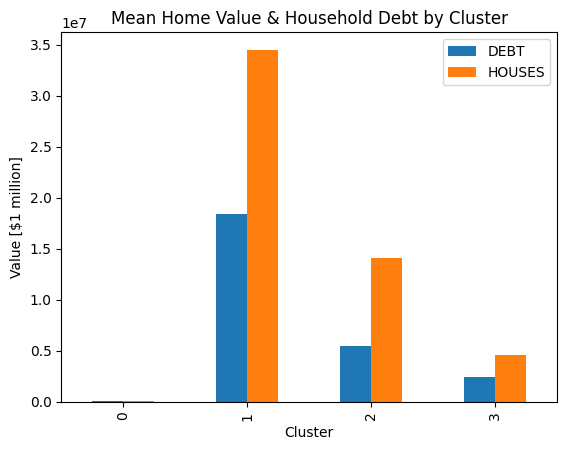

In [ ]:
# Create side-by-side bar chart of `xgb`
xgb.plot(kind = "bar")
plt.xlabel("Cluster")
plt.ylabel("Value [$1 million]")
plt.title("Mean Home Value & Household Debt by Cluster");

In [ ]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    mask = (df["NETWORTH"] < 2e6) & (df["TURNFEAR"]==1)
    df = df[mask]
    return df

In [ ]:
df = wrangle("/content/SCFP2019.csv")
print(df.shape)
df.head()

(4418, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


In [ ]:
# Calculate variance, get 10 largest features
top_ten_var = df.var().sort_values().tail(10)
top_ten_var

PLOAN1      1.140894e+10
ACTBUS      1.251892e+10
BUS         1.256643e+10
KGTOTAL     1.346475e+10
DEBT        1.848252e+10
NHNFIN      2.254163e+10
HOUSES      2.388459e+10
NETWORTH    4.847029e+10
NFIN        5.713939e+10
ASSET       8.303967e+10
dtype: float64

AttributeError: ignored

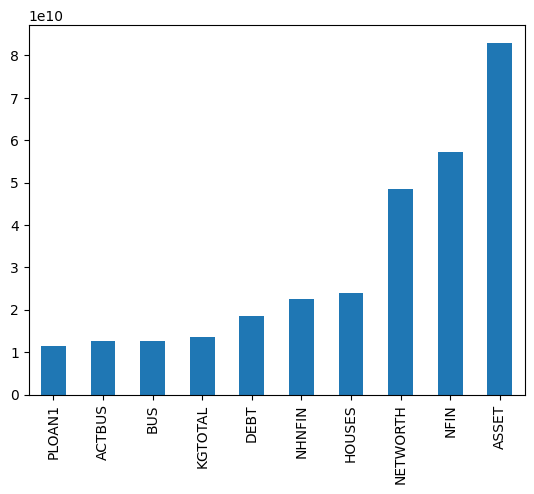

In [ ]:
# Create horizontal bar chart of `top_ten_var`
fig = top_ten_var.plot(kind = "bar" )

fig.show()

In [ ]:
# Create a boxplot of `NHNFIN`
fig = px.box(
    data_frame = df,
    x = "NHNFIN"

)

fig.show()

In [ ]:
top_ten_trim_var = df.apply(trimmed_var).sort_values().tail(5)
top_ten_trim_var

DEBT        3.089865e+09
NETWORTH    3.099929e+09
HOUSES      4.978660e+09
NFIN        8.456442e+09
ASSET       1.175370e+10
dtype: float64

AttributeError: ignored

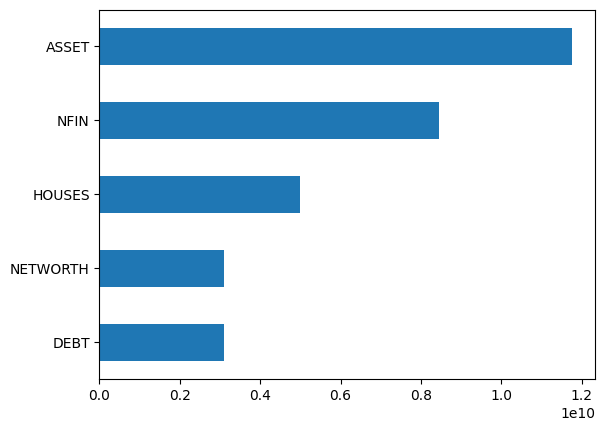

In [ ]:
fig = top_ten_trim_var.plot(kind="barh")

fig.show()

In [ ]:
high_var_cols = top_ten_trim_var.index.to_list()
high_var_cols

['DEBT', 'NETWORTH', 'HOUSES', 'NFIN', 'ASSET']

In [ ]:
X = df[high_var_cols]
print("X shape:", X.shape)
X.head()

X shape: (4418, 5)


,DEBT,NETWORTH,HOUSES,NFIN,ASSET
5,12200.0,-6710.0,0.0,3900.0,5490.0
6,12600.0,-4710.0,0.0,6300.0,7890.0
7,15300.0,-8115.0,0.0,5600.0,7185.0
8,14100.0,-2510.0,0.0,10000.0,11590.0
9,15400.0,-5715.0,0.0,8100.0,9685.0


In [ ]:
X_summary = X.aggregate(["mean", "std"]).astype(int)
X_summary

,DEBT,NETWORTH,HOUSES,NFIN,ASSET
mean,72701,76387,74530,117330,149089
std,135950,220159,154546,239038,288166


In [ ]:
ss = StandardScaler()

# Transform `X`
X_scaled_data = ss.fit_transform(X)

# Put `X_scaled_data` into DataFrame
X_scaled = pd.DataFrame(X_scaled_data, columns = X.columns)

print("X_scaled shape:", X_scaled.shape)
X_scaled.head()

X_scaled shape: (4418, 5)


,DEBT,NETWORTH,HOUSES,NFIN,ASSET
0,-0.445075,-0.377486,-0.48231,-0.474583,-0.498377
1,-0.442132,-0.368401,-0.48231,-0.464541,-0.490047
2,-0.422270,-0.383868,-0.48231,-0.467470,-0.492494
3,-0.431097,-0.358407,-0.48231,-0.449061,-0.477206
4,-0.421534,-0.372966,-0.48231,-0.457010,-0.483818


In [ ]:
X_scaled_summary = X_scaled.aggregate(["mean", "std"]).astype(int)
X_scaled_summary

,DEBT,NETWORTH,HOUSES,NFIN,ASSET
mean,0,0,0,0,0
std,1,1,1,1,1


In [ ]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    model = make_pipeline(
        StandardScaler(),
        KMeans(n_clusters=k, random_state=42)
    )
    model.fit(X)
    inertia_errors.append(model.named_steps["kmeans"].inertia_)
    silhouette_scores.append(silhouette_score(X, model.named_steps["kmeans"].labels_))

print("Inertia:", inertia_errors[:3])
print()
print("Silhouette Scores:", silhouette_scores[:3])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

Inertia: [11028.058082607175, 7190.526303575358, 5924.997726868039]

Silhouette Scores: [0.7464502937083215, 0.7044601307791996, 0.6962653079183132]


In [ ]:
# Create line plot of `inertia_errors` vs `n_clusters`
fig = px.line(
    x= n_clusters,
    y = inertia_errors
)

fig.show()

In [ ]:
# Create a line plot of `silhouette_scores` vs `n_clusters`
fig = px.line(
    x= n_clusters,
    y = silhouette_scores
)

fig.show()

In [ ]:
final_model = make_pipeline(
        StandardScaler(),
        KMeans(n_clusters=4, random_state=42)
    )

final_model.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

In [ ]:
labels = final_model.named_steps["kmeans"].labels_
print(labels[:5])

[0 0 0 0 0]


In [ ]:
xgb = X.groupby(labels).mean()
xgb

,DEBT,NETWORTH,HOUSES,NFIN,ASSET
0,26551.075439,13676.153182,13745.637777,2.722605e+04,4.022723e+04
1,218112.818182,174713.441558,257403.246753,3.305884e+05,3.928263e+05
2,116160.779817,965764.155963,264339.449541,7.800611e+05,1.081925e+06
3,732937.575758,760397.575758,826136.363636,1.276227e+06,1.493335e+06


In [ ]:
# Create side-by-side bar chart of `xgb`
fig = px.bar(
    xgb,
    barmode="group"

)

fig.show()

Remember that our clusters are based partially on NETWORTH, which means that the households in the 0 cluster have the smallest net worth, and the households in the 2 cluster have the highest. Based on that, there are some interesting things to unpack here.

First, take a look at the DEBT variable. You might think that it would scale as net worth increases, but it doesn't. The lowest amount of debt is carried by the households in cluster 2, even though the value of their houses (shown in green) is roughly the same. You can't really tell from this data what's going on, but one possibility might be that the people in cluster 2 have enough money to pay down their debts, but not quite enough money to leverage what they have into additional debts. The people in cluster 3, by contrast, might not need to worry about carrying debt because their net worth is so high.

Finally, since we started out this project looking at home values, take a look at the relationship between DEBT and HOUSES. The value of the debt for the people in cluster 0 is higher than the value of their houses, suggesting that most of the debt being carried by those people is tied up in their mortgages — if they own a home at all. Contrast that with the other three clusters: the value of everyone else's debt is lower than the value of their homes.

So all that's pretty interesting, but it's different from what we did last time, right? At this point in the last lesson, we made a scatter plot. This was a straightforward task because we only worked with two features, so we could plot the data points in two dimensions. But now X has five dimensions! How can we plot this to give stakeholders a sense of our clusters?

Since we're working with a computer screen, we don't have much of a choice about the number of dimensions we can use: it's got to be two. So, if we're going to do anything like the scatter plot we made before, we'll need to take our 5-dimensional data and change it into something we can look at in 2 dimensions.